In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


truncar = 4


# Carregue os dados do arquivo CSV com cabeçalho
df = pd.read_csv('student-por.csv')
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = le.fit_transform(df[col])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int32
 16  famsup      649 non-null    int32
 17  paid        649 non-null    int32
 18  activities  649 non-null    int32
 19  nursery     649 non-null    int32
 20  higher      649 non-null    int3

Valores totais: 


G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

<Axes: >

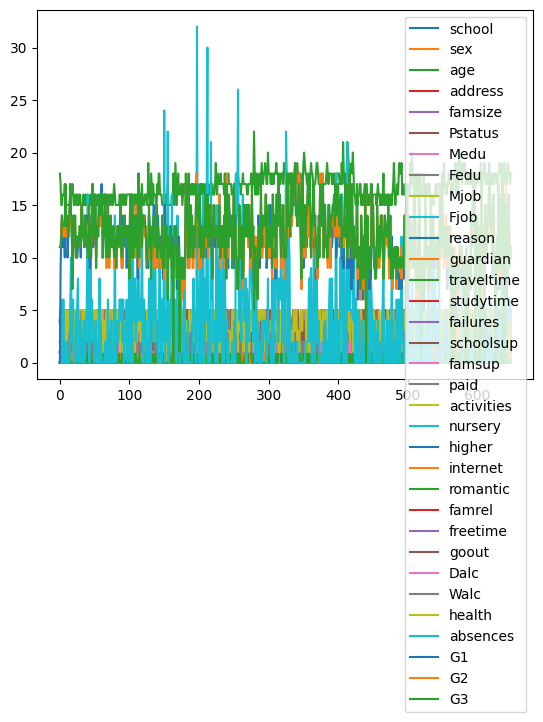

In [2]:

print('Valores totais: ')
display((df.iloc[:, -1]).value_counts())

df.plot()

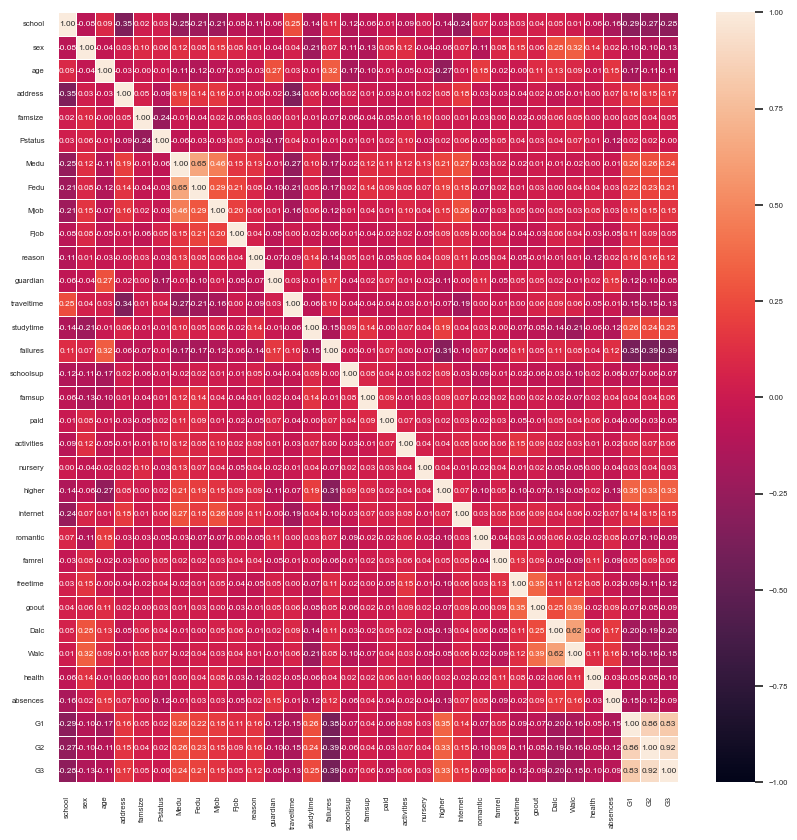

In [3]:
import seaborn as sn
#analisando o relacionamento entre as variáveis
plt.figure(figsize=(10, 10))
sn.set(font_scale=.5)
sn.heatmap(df.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f")


plt.savefig("graficos/correlation_matrix.png", dpi=800)
plt.show()



# Codifique as variáveis categóricas
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
for coluna in df[:]:
    df[coluna] = label_encoder.fit_transform(df[coluna])

# TUDO JUNTO

In [4]:
erro_mae_RLM = []
erro_mse_RLM = []
erro_rmse_RLM = []
coefTreino_RLM = []
coefTeste_RLM = []


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

display(df)
loop =20
for i in range(loop):


  # Divida os dados em conjuntos de treinamento e teste
  x_treino, x_teste, y_treino, y_teste = train_test_split(df.drop('G3', axis=1), df['G3'], test_size=0.5)

  # Instancia um modelo de RLM
  modelo= LinearRegression(fit_intercept=True)

  # Treine o modelo
  modelo.fit(x_treino, y_treino)

  # Faça previsões
  predict = modelo.predict(x_teste)


  erro_mae_RLM.append(mean_absolute_error(y_teste, predict))
  erro_mse_RLM.append(mean_squared_error(y_teste, predict))
  erro_rmse_RLM.append((mean_squared_error(y_teste, predict)))

print(erro_mae_RLM)

print(erro_mse_RLM)

print(erro_rmse_RLM)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


[0.888188659164332, 0.8385763078775141, 0.8666281708658097, 0.9255251818424379, 0.9051473719625627, 0.8391075302894382, 0.8895030798481011, 0.7984842247920461, 0.837544882367054, 0.9108243416226507, 0.8785450746953994, 0.8608860425654753, 0.8640796489233139, 0.8440922302299014, 0.8596000953452061, 0.8839721174708681, 0.7925016327143044, 0.8174781883911314, 0.9006445954272095, 0.869100627148321]
[1.8126718125327579, 1.4581769194355585, 1.8981665761592057, 2.269321107597291, 1.972791872460599, 1.5123942287319634, 2.0077284643264184, 1.3803336576865335, 1.7175321705212445, 2.160534620722443, 2.1292226663359135, 1.5425399354760416, 1.3812076724760838, 1.778551448271571, 1.7814458771034127, 2.0771564898335004, 1.6416704383460925, 1.5730752096285552, 2.1833383097426675, 1.6926114556128204]
[1.8126718125327579, 1.4581769194355585, 1.8981665761592057, 2.269321107597291, 1.972791872460599, 1.5123942287319634, 2.0077284643264184, 1.3803336576865335, 1.7175321705212445, 2.160534620722443, 2.12922



Execução:  1

Calibragem- 1
K-Nearest Neighbors
SVR
1.473497810583538
passo aqui
MLP
Random Forest
Gradient Boosting

Treinamento 1
SVR
MLP
Random Forest


Execução:  2

Calibragem- 2
K-Nearest Neighbors
SVR
1.6658711510554063
passo aqui
1.6562867424527123
passo aqui
1.6480611223812607
passo aqui
MLP
Random Forest
Gradient Boosting

Treinamento 2
SVR
MLP
Random Forest


Execução:  3

Calibragem- 3
K-Nearest Neighbors
SVR
1.4220530348844038
passo aqui
1.4024045844372333
passo aqui
1.4006349451214826
passo aqui
MLP
Random Forest
Gradient Boosting

Treinamento 3
SVR
MLP
Random Forest


Execução:  4

Calibragem- 4
K-Nearest Neighbors
SVR
2.4980346327035456
passo aqui
MLP
Random Forest
Gradient Boosting

Treinamento 4
SVR
MLP
Random Forest


Execução:  5

Calibragem- 5
K-Nearest Neighbors
SVR
1.76469670546888
passo aqui
MLP
Random Forest
Gradient Boosting

Treinamento 5
SVR
MLP
Random Forest


Execução:  6

Calibragem- 6
K-Nearest Neighbors
SVR
1.1203718270404364
passo aqui
MLP
Random For

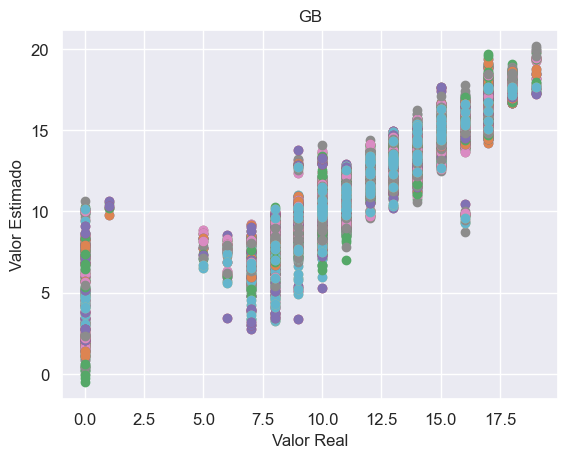

In [5]:
# CLASSIFICADORES - CERTO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from itertools import product









erro_mae_MLP = []
erro_mse_MLP = []
erro_rmse_MLP = []
coefTreinoMLP = []
coefTesteMLP = []

erro_mae_KNN = []
erro_mse_KNN = []
erro_rmse_KNN = []
coefTreinoKNN = []
coefTesteKNN = []

erro_mae_GB = [] 
erro_mse_GB = []
erro_rmse_GB = []
coefTreinoGB = []
coefTesteGB = []

erro_mae_RF = []
erro_mse_RF = []
erro_rmse_RF = []
coefTreinoRF = []
coefTesteRF = []

erro_mae_SVM = [] 
erro_mse_SVM = []
erro_rmse_SVM = []
coefTreinoSVM = []
coefTesteSVM = []



for i in range(loop):

    print("\n\nExecução: ", i+1)
    
    x = df.iloc[:, :-1]  # Todos exceto a última coluna
    y = df.iloc[:, -1]   # última coluna

    # 70% para treinamento - 15% para validação - 15% para teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, shuffle = True)
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)


    ######################################## CALIBRAGEM !!!!########################################
    print("\nCalibragem-", i+1)


    # KNR
    print("K-Nearest Neighbors")
    param_grid_knn = {
        'n_neighbors': [1, 5, 10,50, 100],
        'weights': ['uniform', 'distance'],
    }
    melhor_validacao_knn = 1000
    best_params_knn = {}
    for n_neighbors in param_grid_knn['n_neighbors']:
        for weights in param_grid_knn['weights']:
          knn = KNeighborsRegressor(
              n_neighbors=n_neighbors,
              weights=weights,
          )
          knn.fit(x_treino, y_treino)
          opiniao_knn = knn.predict(x_validacao)
          mse_validacao_knn = mean_squared_error(y_validacao, opiniao_knn)
          if mse_validacao_knn < melhor_validacao_knn:
              melhor_validacao_knn = mse_validacao_knn
              best_params_knn = {
                  'n_neighbors': n_neighbors,
                  'weights': weights

              }

    # Support Vector Regressor (SVR)
    print("SVR")
    param_grid_svr = {
        'C': [0.1, 0.5, 1],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }
    melhor_validacao_svr = 1000
    best_params_svr = {}
    for C, kernel in product(param_grid_svr['C'], param_grid_svr['kernel']):
        svr = SVR(C=C, kernel=kernel)
        svr.fit(x_treino, y_treino)
        opiniao_svr = svr.predict(x_validacao)
        mse_validacao_svr = mean_squared_error(y_validacao, opiniao_svr)

        if mse_validacao_svr < melhor_validacao_svr:
            melhor_validacao_svr = mse_validacao_svr
            best_params_svr = {'C': C, 'kernel': kernel}
            print(mse_validacao_svr)
            print('passo aqui')



    #MLP
    print("MLP")
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,)],
        'activation': ['relu', 'logistic', 'tanh', 'identity'],
        'solver': ['adam'],
        'max_iter': [100, 200, 300],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
    melhor_validacao = 1000
    best_paramsMLP = {}
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    mlp = MLPRegressor(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )
                    mlp.fit(x_treino, y_treino)
                    opiniao = mlp.predict(x_validacao)
                    mse_validacao = mean_squared_error(y_validacao, opiniao)
                    if (mse_validacao < melhor_validacao):
                        melhor_validacao = melhor_validacao
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }   
                    
                    #print(mse_validacao)



    #Random Forest
    print("Random Forest")
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    melhor_validacao = 1000 
    best_params_rf = {}
    for n_estimators in param_grid_rf['n_estimators']:
        for criterion in param_grid_rf['criterion']:
            for max_depth in param_grid_rf['max_depth']:
                for min_samples_split in param_grid_rf['min_samples_split']:
                    for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                        rf = RandomForestRegressor(
                            n_estimators=n_estimators,
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                        )
                        rf.fit(x_treino, y_treino)
                        opiniao = mlp.predict(x_validacao)
                        mse_validacao = mean_squared_error(y_validacao, opiniao)
                        # Verifique se a acurácia é a melhor até agora
                        if mse_validacao < melhor_validacao:
                            melhor_validacao = melhor_validacao
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }

    # Gradient Boosting (GB)
    print("Gradient Boosting")
    param_grid_gb = {
        'n_estimators': [50, 100, 200],
        'loss': ['huber', 'quantile', 'absolute_error', 'squared_error'],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.001, 0.01, 0.1],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    melhor_validacao_gb = 1000
    best_params_gb = {}

    for n_estimators, loss, max_depth, learning_rate, min_samples_split, min_samples_leaf in product(*param_grid_gb.values()):
        gb = GradientBoostingRegressor(
            n_estimators=n_estimators,
            loss=loss,
            max_depth=max_depth,
            learning_rate=learning_rate,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
        )
        gb.fit(x_treino, y_treino)
        opiniao_gb = gb.predict(x_validacao)
        mse_validacao_gb = mean_squared_error(y_validacao, opiniao_gb)

        if mse_validacao_gb < melhor_validacao_gb:
            melhor_validacao_gb = mse_validacao_gb
            best_params_gb = {
                'n_estimators': n_estimators,
                'loss': loss,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
            }

    


    ######################################## TREINAMENTO  ########################################
    print("\nTreinamento", i+1)

    #SVR
    print("SVR")
    svm = SVR(
        C=best_params_svr["C"],
        kernel=best_params_svr['kernel'],
    )
    svm.fit(x_treino, y_treino)
    opiniao = svm.predict(x_teste)
    erro_mae_SVM.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_SVM.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_SVM.append((np.sqrt(mean_squared_error(y_teste, opiniao))))
    coefTreinoSVM.append(svm.score(x_treino,y_treino))
    coefTesteSVM.append(svm.score(x_teste,y_teste))
    plt.scatter(y_teste,opiniao)
    titulo = "SVM"
    plt.title(titulo, fontsize = 12)
    plt.xlabel("Valor Real", fontsize = 12),  
    plt.ylabel("Valor Estimado", fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    nome = "graficos/" + str(i+1) + "-" + titulo + ".png"
    plt.savefig(nome, dpi = 500)



    #KNR - TREINO
    knn_final = KNeighborsRegressor(**best_params_knn)
    knn_final.fit(x_treino, y_treino)
    opiniao_knn_teste = knn_final.predict(x_teste)
    erro_mae_KNN.append(mean_absolute_error(y_teste, opiniao_knn_teste))
    erro_mse_KNN.append(mean_squared_error(y_teste, opiniao_knn_teste))
    erro_rmse_KNN.append((mean_squared_error(y_teste, opiniao_knn_teste)))
    coefTreinoKNN.append(knn_final.score(x_treino,y_treino))
    coefTesteKNN.append(knn_final.score(x_teste,y_teste))
    plt.scatter(y_teste,opiniao)
    titulo = "KNR"
    plt.title(titulo, fontsize = 12)
    plt.xlabel("Valor Real", fontsize = 12),  
    plt.ylabel("Valor Estimado", fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    nome = "graficos/" + str(i+1) + "-" + titulo + ".png"
    plt.savefig(nome, dpi = 500)

    #MLP
    print("MLP")
    mlp = MLPRegressor(
                        hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                        activation=best_paramsMLP['activation'],
                        solver='adam',
                        max_iter=best_paramsMLP['max_iter'],
                        learning_rate_init=best_paramsMLP['learning_rate_init']
                    )
    mlp.fit(x_treino, y_treino)
    opiniao = mlp.predict(x_teste)
    erro_mae_MLP.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_MLP.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_MLP.append((np.sqrt(mean_squared_error(y_teste, opiniao))))
    coefTreinoMLP.append(mlp.score(x_treino,y_treino))
    coefTesteMLP.append(mlp.score(x_teste,y_teste))
    plt.scatter(y_teste,opiniao)
    titulo = "MLP"
    plt.title(titulo, fontsize = 12)
    plt.xlabel("Valor Real", fontsize = 12),  
    plt.ylabel("Valor Estimado", fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    nome = "graficos/" + str(i+1) + "-" + titulo + ".png"
    plt.savefig(nome, dpi = 500)


    # Random Forest
    print("Random Forest")
    rf = RandomForestRegressor(
                        n_estimators=best_params_rf['n_estimators'],
                        criterion=best_params_rf['criterion'],
                        max_depth=best_params_rf['max_depth'],
                        min_samples_split=best_params_rf['min_samples_split'],
                        min_samples_leaf=best_params_rf['min_samples_leaf'],
                        random_state=42  # Pode ajustar ou remover conforme necessário
                    )

    rf.fit(x_treino, y_treino)
    opiniao = rf.predict(x_teste)
    erro_mae_RF.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_RF.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_RF.append((np.sqrt(mean_squared_error(y_teste, opiniao))))
    coefTreinoRF.append(rf.score(x_treino,y_treino))
    coefTesteRF.append(rf.score(x_teste,y_teste))
    plt.scatter(y_teste,opiniao)
    titulo = "RF"
    plt.title(titulo, fontsize = 12)
    plt.xlabel("Valor Real", fontsize = 12),  
    plt.ylabel("Valor Estimado", fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    nome = "graficos/" + str(i+1) + "-" + titulo + ".png"
    plt.savefig(nome, dpi = 500)

    #Gradient Boosting
    gb_final = GradientBoostingRegressor(**best_params_gb)
    gb_final.fit(x_treino, y_treino)
    opiniao_gb_teste = gb_final.predict(x_teste)
    erro_mae_GB.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_GB.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_GB.append((np.sqrt(mean_squared_error(y_teste, opiniao))))
    coefTreinoGB.append(gb_final.score(x_treino,y_treino))
    coefTesteGB.append(gb_final.score(x_teste,y_teste))
    plt.scatter(y_teste,opiniao)
    titulo = "GB"
    plt.title(titulo, fontsize = 12)
    plt.xlabel("Valor Real", fontsize = 12),  
    plt.ylabel("Valor Estimado", fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    nome = "graficos/" + str(i+1) + "-" + titulo + ".png"
    plt.savefig(nome, dpi = 500)




    ###### DATFRAME FINAIS ###############


    dfMAE = pd.DataFrame({
        "KNR": erro_mae_KNN,
        "SVM": erro_mae_SVM,
        "RF": erro_mae_RF,
        "GB": erro_mae_GB,
        "MLP": erro_mae_MLP
    })
    dfMAE.to_csv("tabelas/dfMAE.csv", sep =';', index=False)


    dfMSE = pd.DataFrame({
        "KNR": erro_mse_KNN,
        "SVM": erro_mse_SVM,
        "RF": erro_mse_RF,
        "GB": erro_mse_GB,
        "MLP": erro_mse_MLP
    })
    dfMSE.to_csv("tabelas/dfMSE.csv", sep =';', index=False)

    dfRMSE = pd.DataFrame({
        "KNR": erro_mse_KNN,
        "SVM": erro_mse_SVM,
        "RF": erro_mse_RF,
        "GB": erro_mse_GB,
        "MLP": erro_mse_MLP
    })
    dfRMSE.to_csv("tabelas/dfRMSE.csv", sep =';', index=False)
    
    dfCoefTreino = pd.DataFrame({
        "KNR": coefTreinoKNN,
        "SVM": coefTreinoSVM,
        "RF": coefTreinoRF,
        "GB": coefTreinoGB,
        "MLP": coefTreinoMLP
    })
    dfCoefTreino.to_csv("tabelas/dfCoefTreino.csv", sep =';', index=False)

    dfCoefTeste = pd.DataFrame({
        "KNR": coefTesteKNN,
        "SVM": coefTesteKNN,
        "RF": coefTesteRF,
        "GB": coefTesteGB,
        "MLP": coefTesteMLP
    })
    dfCoefTeste.to_csv("tabelas/dfCoefTeste.csv", sep =';', index=False)
    

    




In [8]:
from scipy import stats
from decimal import Decimal, getcontext

getcontext().prec = 28

def mann_whitney(v1, v2, str1, str2):
    # print("v1 = ", v1)
    # print("v2 = ", v2)
    pvalue = stats.mannwhitneyu(v1, v2).pvalue
    if(pvalue < 0.05):
        print("os regressores ", str1, " e ", str2, " são discrepantes, com pvalue = ", pvalue)
    else:
        print("os regressores ", str1, " e ", str2, " não são discrepantes, com pvalue = ", pvalue)

# realizando o teste de kruskal wallis para verificar se há diferença significativa entre os regressores
kruskal_resul = stats.kruskal(erro_mse_GB, erro_mse_KNN, erro_mse_SVM, erro_mse_RF
                              , erro_mse_MLP, erro_mse_RLM)
if(kruskal_resul.pvalue > 0.05):
    print("Há diferença estatisticamente significativa entre os regressores, com pvalue = ", kruskal_resul.pvalue)
else:
    print("Não há diferença estatisticamente significativa entre os regressores, com pvalue = ", kruskal_resul.pvalue)


# realizando os teste mann whitney par a par
mann_whitney(erro_mse_RLM, erro_mse_KNN, 'RLM', 'KNR')
mann_whitney(erro_mse_RLM, erro_mse_SVM, 'RLM', 'SVR')
mann_whitney(erro_mse_RLM, erro_mse_MLP, 'RLM', 'MLP')
mann_whitney(erro_mse_RLM, erro_mse_RF, 'RLM', 'RF')
mann_whitney(erro_mse_RLM, erro_mse_GB, 'RLM', 'GB')

mann_whitney(erro_mse_KNN, erro_mse_SVM, 'KNR', 'SVR')
mann_whitney(erro_mse_KNN, erro_mse_MLP, 'KNR', 'MLP')
mann_whitney(erro_mse_KNN, erro_mse_RF, 'KNR', 'RF')
mann_whitney(erro_mse_KNN, erro_mse_GB, 'KNR', 'GB')

mann_whitney(erro_mse_KNN, erro_mse_MLP, 'SVR', 'MLP')
mann_whitney(erro_mse_KNN, erro_mse_RF, 'SVR', 'RF')
mann_whitney(erro_mse_KNN, erro_mse_GB, 'SVR', 'GB')

mann_whitney(erro_mse_MLP, erro_mse_RF, 'MLP', 'RF')
mann_whitney(erro_mse_MLP, erro_mse_GB, 'MLP', 'GB')

mann_whitney(erro_mse_RF, erro_mse_GB, 'RF', 'GB')



Há diferença estatisticamente significativa entre os regressores, com pvalue =  0.013984206371271209
os regressores  RLM  e  KNR  são discrepantes, com pvalue =  0.02226991130981313
os regressores  RLM  e  SVR  não são discrepantes, com pvalue =  0.11355139298344043
os regressores  RLM  e  MLP  não são discrepantes, com pvalue =  0.19883449020829447
os regressores  RLM  e  RF  não são discrepantes, com pvalue =  0.9892089047911196
os regressores  RLM  e  GB  não são discrepantes, com pvalue =  0.9892089047911196
os regressores  KNR  e  SVR  são discrepantes, com pvalue =  0.0019533482730293822
os regressores  KNR  e  MLP  são discrepantes, com pvalue =  0.003056629228174791
os regressores  KNR  e  RF  são discrepantes, com pvalue =  0.03851496043112118
os regressores  KNR  e  GB  são discrepantes, com pvalue =  0.03851496043112118
os regressores  SVR  e  MLP  são discrepantes, com pvalue =  0.003056629228174791
os regressores  SVR  e  RF  são discrepantes, com pvalue =  0.0385149604311

In [14]:


vetores = [
erro_mae_RLM,
erro_mae_KNN,
erro_mae_SVM,
erro_mae_RF,
erro_mae_GB,
erro_mae_MLP,

erro_mse_RLM,
erro_mse_KNN,
erro_mse_SVM,
erro_mse_RF,
erro_mse_GB,
erro_mse_MLP,

erro_rmse_RLM,
erro_rmse_KNN,
erro_rmse_SVM,
erro_rmse_RF,
erro_rmse_GB,
erro_rmse_MLP,

coefTreinoKNN,
coefTreinoSVM,
coefTreinoRF,
coefTreinoGB,
coefTreinoMLP,

coefTesteKNN,
coefTesteSVM,
coefTesteRF,
coefTesteGB,
coefTesteMLP]

for vetor in vetores:
    media = sum(vetor) / len(vetor)
    vetor.append(media)


dfMAE = pd.DataFrame({
    "KNR": erro_mae_KNN,
    "SVM": erro_mae_SVM,
    "RF": erro_mae_RF,
    "GB": erro_mae_GB,
    "MLP": erro_mae_MLP
})
dfMAE.to_csv("tabelas/dfMAE.csv", sep =';', index=False)
dfMAE.to_latex("tabelas/dfMAE.latex", index=False, float_format="%.2f")


dfMSE = pd.DataFrame({
    "KNR": erro_mse_KNN,
    "SVM": erro_mse_SVM,
    "RF": erro_mse_RF,
    "GB": erro_mse_GB,
    "MLP": erro_mse_MLP
})
dfMSE.to_csv("tabelas/dfMSE.csv", sep =';', index=False)
dfMSE.to_latex("tabelas/dfMSE.latex", index=False, float_format="%.2f")

dfRMSE = pd.DataFrame({
    "KNR": erro_rmse_KNN,
    "SVM": erro_rmse_SVM,
    "RF": erro_rmse_RF,
    "GB": erro_rmse_GB,
    "MLP": erro_rmse_MLP
})
dfRMSE.to_csv("tabelas/dfRMSE.csv", sep =';', index=False)
dfRMSE.to_latex("tabelas/dfRMSE.latex", index=False, float_format="%.2f")


dfCoefTreino = pd.DataFrame({
    "KNR": coefTreinoKNN,
    "SVM": coefTreinoSVM,
    "RF": coefTreinoRF,
    "GB": coefTreinoGB,
    "MLP": coefTreinoMLP
})
dfCoefTreino.to_csv("tabelas/dfCoefTreino.csv", sep =';', index=False)
dfCoefTreino.to_latex("tabelas/dfCoefTreino.latex", index=False, float_format="%.2f")

dfCoefTeste = pd.DataFrame({
    "KNR": coefTesteKNN,
    "SVM": coefTesteKNN,
    "RF": coefTesteRF,
    "GB": coefTesteGB,
    "MLP": coefTesteMLP
})
dfCoefTeste.to_csv("tabelas/dfCoefTeste.csv", sep =';', index=False)
dfCoefTeste.to_latex("tabelas/dfCoefTeste.latex", index=False, float_format="%.2f")
    
